In [ ]:
# 上方添加行： ESC a Enter
# 下方添加行： ESC b Enter
# 删除一个cell ESC d d

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

weather = pd.read_csv('weatherAUS.csv')
weather = weather.sample(n=5000, axis=0)
weather.index = range(weather.shape[0])

In [306]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-12-03,NorahHead,12.7,20.8,0.0,NaN,NaN,NNE,37.0,SSW,...,64.0,59.0,1020.5,1017.4,NaN,NaN,18.7,19.9,No,No
1,2011-01-25,Mildura,16.9,37.6,0.0,9.0,12.3,S,59.0,NaN,...,54.0,33.0,1007.8,1004.9,1.0,1.0,22.8,34.9,No,No
2,2015-08-01,Melbourne,NaN,NaN,NaN,3.6,0.0,N,80.0,WSW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-06,Cairns,22.5,32.6,0.0,7.6,9.6,SE,37.0,SSE,...,70.0,54.0,1011.2,1008.2,5.0,2.0,28.3,31.5,No,No
4,2013-11-11,Perth,13.5,30.7,0.0,9.4,11.1,SW,30.0,SSW,...,47.0,40.0,1014.6,1012.3,1.0,2.0,24.5,27.7,No,No


In [307]:
weather['RainTomorrow'].notnull()

0        True
1        True
2       False
3        True
4        True
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Name: RainTomorrow, Length: 5000, dtype: bool

In [2]:
weather = weather.loc[weather['RainTomorrow'].notnull(),:]

In [3]:
X = weather.iloc[:,:-1]
y = weather.iloc[:,-1]

In [237]:
X.shape

(4887, 22)

In [238]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [239]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4887 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4887 non-null   object 
 1   Location       4887 non-null   object 
 2   MinTemp        4866 non-null   float64
 3   MaxTemp        4876 non-null   float64
 4   Rainfall       4835 non-null   float64
 5   Evaporation    2716 non-null   float64
 6   Sunshine       2485 non-null   float64
 7   WindGustDir    4570 non-null   object 
 8   WindGustSpeed  4573 non-null   float64
 9   WindDir9am     4537 non-null   object 
 10  WindDir3pm     4745 non-null   object 
 11  WindSpeed9am   4841 non-null   float64
 12  WindSpeed3pm   4784 non-null   float64
 13  Humidity9am    4828 non-null   float64
 14  Humidity3pm    4748 non-null   float64
 15  Pressure9am    4405 non-null   float64
 16  Pressure3pm    4411 non-null   float64
 17  Cloud9am       3001 non-null   float64
 18  Cloud3pm

In [310]:
X.isnull().mean()
# 缺失值侧率
# 缺的少：
# 缺的多：
# float缺失
# object缺失

Date             0.000000
Location         0.000000
MinTemp          0.004498
MaxTemp          0.002249
Rainfall         0.009814
Evaporation      0.422613
Sunshine         0.465549
WindGustDir      0.065222
WindGustSpeed    0.064608
WindDir9am       0.067880
WindDir3pm       0.026784
WindSpeed9am     0.009609
WindSpeed3pm     0.019219
Humidity9am      0.011450
Humidity3pm      0.023921
Pressure9am      0.099162
Pressure3pm      0.098753
Cloud9am         0.372930
Cloud3pm         0.400532
Temp9am          0.006338
Temp3pm          0.018606
RainToday        0.009814
dtype: float64

In [241]:
y.shape

(4887,)

In [311]:
y.isnull().sum()

0

In [243]:
np.unique(y) # = y.unique()

array(['No', 'Yes'], dtype=object)

In [4]:
# 先分train和test，再进行特征工程
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0])

In [5]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-04-23,Tuggeranong,10.9,19.6,0.0,NaN,NaN,NNE,20.0,ENE,...,6.0,62.0,45.0,1022.1,1017.2,NaN,NaN,15.1,17.6,No
1,2010-02-12,Brisbane,21.0,31.1,0.0,7.0,11.8,NE,26.0,SW,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,No
2,2008-07-07,Canberra,3.0,11.1,0.8,1.4,0.2,W,35.0,NaN,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,No
3,2009-06-13,SydneyAirport,7.6,20.1,0.0,2.6,4.6,WNW,31.0,NW,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,No
4,2017-03-08,Townsville,25.0,32.0,2.4,7.6,NaN,E,35.0,NaN,...,26.0,81.0,67.0,1010.7,1006.8,3.0,NaN,29.1,31.6,Yes


In [6]:
# 是否有样本不均衡？
y_train.value_counts()

No     2676
Yes     754
Name: RainTomorrow, dtype: int64

In [7]:
y_test.value_counts()

No     1164
Yes     307
Name: RainTomorrow, dtype: int64

In [ ]:
# 轻微的样本不均衡

In [8]:
# 二分类标签转码 LabelEncoder-标签专用（可以用一维）
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y_train)  # 可以输入以为数据
# 如果test中没有出现新的标签，那么可以用train fit的数据transform test
# 如果test中出现了新的标签，会报错
y_train = pd.DataFrame(encoder.transform(y_train))
y_test = pd.DataFrame(encoder.transform(y_test))

In [9]:
# 处理好标签之后先保存
y_train.to_csv('train_data.csv')
y_test.to_csv('test_data.csv')

In [318]:
y_train

,0
0,0
1,1
2,1
3,1
4,1
...,...
3418,0
3419,1
3420,0
3421,0


In [319]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2011-12-03,NorahHead,12.7,20.8,0.0,NaN,NaN,NNE,37.0,SSW,...,19.0,64.0,59.0,1020.5,1017.4,NaN,NaN,18.7,19.9,No
1,2011-01-25,Mildura,16.9,37.6,0.0,9.0,12.3,S,59.0,NaN,...,15.0,54.0,33.0,1007.8,1004.9,1.0,1.0,22.8,34.9,No
3,2009-04-06,Cairns,22.5,32.6,0.0,7.6,9.6,SE,37.0,SSE,...,28.0,70.0,54.0,1011.2,1008.2,5.0,2.0,28.3,31.5,No
4,2013-11-11,Perth,13.5,30.7,0.0,9.4,11.1,SW,30.0,SSW,...,17.0,47.0,40.0,1014.6,1012.3,1.0,2.0,24.5,27.7,No
5,2014-09-06,AliceSprings,13.0,28.4,0.0,7.0,7.9,ENE,28.0,NE,...,15.0,28.0,17.0,1018.7,1014.9,7.0,7.0,18.4,26.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015-11-16,Portland,11.0,23.9,0.0,4.4,12.4,SE,28.0,E,...,17.0,70.0,59.0,1018.2,1015.1,NaN,NaN,15.4,21.1,No
4996,2012-08-25,Newcastle,8.2,22.7,0.0,NaN,NaN,NaN,NaN,NW,...,NaN,68.0,NaN,NaN,NaN,0.0,NaN,13.9,NaN,No
4997,2011-12-30,Darwin,28.5,33.9,0.0,6.2,6.9,WNW,39.0,W,...,19.0,73.0,86.0,1008.1,1006.7,7.0,5.0,31.2,26.9,No
4998,2011-02-11,SydneyAirport,21.3,33.9,0.0,5.0,8.0,NE,54.0,NNE,...,30.0,59.0,39.0,1016.1,1011.0,2.0,6.0,26.0,33.3,No


In [250]:
# 查看X  
# 偏态问题？  Rainfall
# 量纲统一？
# 异常值？  先考虑每个特征的正常值，再按常识判断是否异常
X_train.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3408.0,12.281103,6.416478,-7.0,-1.886,1.935,4.00,7.7,11.9,17.00,21.00,25.500,31.4
MaxTemp,3415.0,23.255168,7.223612,-2.9,7.900,12.800,14.50,17.8,22.7,28.55,33.00,40.000,47.3
Rainfall,3379.0,2.345220,7.985574,0.0,0.000,0.000,0.00,0.0,0.0,0.80,5.80,37.922,136.4
Evaporation,1910.0,5.417277,4.085781,0.0,0.400,1.000,1.40,2.6,4.8,7.20,10.00,18.164,55.4
Sunshine,1757.0,7.533751,3.799941,0.0,0.000,0.300,1.60,4.7,8.3,10.60,12.10,13.400,13.9
WindGustSpeed,3201.0,39.744455,13.099415,7.0,15.000,20.000,24.00,31.0,39.0,48.00,57.00,78.000,102.0
WindSpeed9am,3384.0,13.711879,8.729963,0.0,0.000,0.000,4.00,7.0,13.0,19.00,26.00,39.000,57.0
WindSpeed3pm,3345.0,18.294469,8.546540,0.0,2.000,6.000,7.00,11.0,17.0,24.00,30.00,42.120,59.0
Humidity9am,3382.0,68.991425,19.200207,2.0,18.000,34.000,44.00,57.0,70.0,83.00,94.00,100.000,100.0
Humidity3pm,3327.0,51.437030,21.122958,0.0,8.000,16.000,23.00,36.0,52.0,66.00,79.00,98.000,100.0


In [251]:
X_test.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1458.0,12.175240,6.409571,-5.1,-1.500,1.785,4.3,7.4,11.8,16.7,21.23,25.386,29.1
MaxTemp,1461.0,23.193771,7.205550,-0.5,9.180,12.700,14.3,17.9,22.6,28.4,32.80,40.840,44.4
Rainfall,1456.0,2.503846,7.429308,0.0,0.000,0.000,0.0,0.0,0.0,1.0,6.90,37.160,83.2
Evaporation,806.0,5.204591,3.742264,0.2,0.400,0.800,1.4,2.6,4.4,6.8,9.80,18.150,35.8
Sunshine,728.0,7.500687,3.695566,0.0,0.000,0.400,1.5,4.7,8.3,10.5,11.70,13.273,13.7
WindGustSpeed,1372.0,40.190233,13.694312,7.0,15.000,22.000,24.0,31.0,39.0,48.0,57.00,81.000,98.0
WindSpeed9am,1457.0,13.884008,8.875025,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.00,41.000,46.0
WindSpeed3pm,1439.0,18.782488,9.032968,0.0,0.000,6.000,9.0,13.0,19.0,24.0,31.00,43.620,61.0
Humidity9am,1446.0,69.332642,18.603735,5.0,21.000,35.000,45.0,58.0,70.0,84.0,93.00,100.000,100.0
Humidity3pm,1421.0,51.867699,20.834680,1.0,8.000,18.000,24.0,37.0,52.0,66.0,80.00,96.000,100.0


In [320]:
# 处理日期/时间  -> 处理缺失值
X_trainc = X_train.copy()
X_trainc.sort_values(by='Location')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
2912,2012-11-05,Adelaide,25.2,29.8,0.4,21.0,NaN,N,74.0,N,...,28.0,41.0,37.0,1006.1,1003.5,NaN,NaN,27.2,29.1,No
1516,2013-04-30,Adelaide,13.3,20.3,0.0,1.2,3.9,N,28.0,SSE,...,11.0,70.0,69.0,1024.4,1022.2,NaN,NaN,17.0,19.0,No
1193,2013-03-02,Adelaide,15.5,30.8,0.0,NaN,11.5,ESE,35.0,E,...,17.0,48.0,21.0,1020.4,1017.2,NaN,NaN,19.0,29.6,No
2220,2010-08-23,Adelaide,9.4,15.6,2.8,6.4,3.0,W,56.0,NNW,...,28.0,95.0,77.0,1013.1,1012.2,NaN,NaN,10.8,12.4,Yes
1161,2013-08-05,Adelaide,10.6,20.6,0.0,2.6,6.7,N,61.0,NNE,...,28.0,75.0,54.0,1015.0,1009.0,NaN,NaN,13.8,19.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,2010-09-17,Woomera,7.8,17.5,0.0,5.2,8.8,SE,41.0,SE,...,15.0,55.0,34.0,1029.4,1024.8,1.0,1.0,11.6,16.4,No
1227,2011-02-21,Woomera,14.9,25.9,0.0,11.0,10.1,SSE,50.0,SE,...,20.0,58.0,29.0,1019.6,1018.7,4.0,7.0,16.2,24.1,No
2143,2012-10-22,Woomera,12.3,31.9,0.0,12.4,NaN,SSE,35.0,ESE,...,15.0,35.0,13.0,1019.9,1015.9,0.0,0.0,18.3,31.0,No
1295,2016-06-24,Woomera,6.7,14.8,0.2,4.6,NaN,SSW,43.0,W,...,24.0,87.0,45.0,1020.2,1021.0,0.0,NaN,9.0,13.1,No


In [321]:
X_trainc.iloc[:,0].value_counts()
# 日期有重复

2014-08-05    6
2017-02-16    6
2015-10-21    6
2009-06-11    5
2012-03-19    5
             ..
2013-11-28    1
2016-12-18    1
2014-05-28    1
2014-12-18    1
2013-05-11    1
Name: Date, Length: 2094, dtype: int64

In [322]:
type(X_trainc.iloc[0,0])  # 字符串 -> 变成数字（编码） 怎么编码？连续性还是分类型？

str

In [ ]:
# 处理方法1：删掉date列
X_train.drop('Date',axis=1)
X_test.drop('Date',axis=1)
X_train.index = range(weather.shape[0])
X_test.index = range(weather.shape[0])

# 处理方法2：转化为与标签相关的特征 - 今天是否下雨？
X_train.loc[X_train['Rainfall']>=0.1,"RainToday"] = 'Yes'
X_train.loc[X_train['Rainfall']<0.1,"RainToday"] = 'No'
X_train.loc[X_train['Rainfall']>=np.nan,"RainToday"] = np.nan

X_test.loc[X_test['Rainfall']>=0.1,"RainToday"] = 'Yes'
X_test.loc[X_test['Rainfall']<0.1,"RainToday"] = 'No'
X_test.loc[X_test['Rainfall']>=np.nan,"RainToday"] = np.nan

In [10]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2009-04-23,Tuggeranong,10.9,19.6,0.0,NaN,NaN,NNE,20.0,ENE,...,6.0,62.0,45.0,1022.1,1017.2,NaN,NaN,15.1,17.6,No
1,2010-02-12,Brisbane,21.0,31.1,0.0,7.0,11.8,NE,26.0,SW,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,No
2,2008-07-07,Canberra,3.0,11.1,0.8,1.4,0.2,W,35.0,NaN,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,No
3,2009-06-13,SydneyAirport,7.6,20.1,0.0,2.6,4.6,WNW,31.0,NW,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,No
4,2017-03-08,Townsville,25.0,32.0,2.4,7.6,NaN,E,35.0,NaN,...,26.0,81.0,67.0,1010.7,1006.8,3.0,NaN,29.1,31.6,Yes


In [ ]:
# 继续处理：按照季节、月份 转化为 相关特征

In [256]:
# 提取月份
int(X_train.loc[0,'Date'].split('-')[1])

12

In [11]:
#所有Date处理：apply
# Apply 是对DateFrame上的某一列进行处理的额一个函数
X_train.loc[:,'Date'] = X_train.loc[:,'Date'].apply(lambda x:int(x.split('-')[1]))

D:\ISO\Anoconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
X_train = X_train.rename(columns={"Date":"Month"})

In [13]:
X_test.loc[:,'Date'] = X_test.loc[:,'Date'].apply(lambda x:int(x.split('-')[1]))
X_test = X_test.rename(columns={"Date":"Month"})

In [14]:
X_test.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,5,PerthAirport,10.6,22.8,0.6,2.2,9.2,SW,30.0,NNE,...,17.0,81.0,56.0,1020.1,1017.8,2.0,4.0,16.0,22.1,No
1,1,Ballarat,10.5,18.6,0.0,NaN,NaN,SW,46.0,SW,...,28.0,80.0,62.0,1007.9,1007.8,6.0,NaN,13.9,16.8,No
2,6,Launceston,2.5,14.9,0.0,NaN,NaN,N,26.0,ESE,...,9.0,90.0,68.0,1039.7,1035.1,NaN,NaN,6.0,14.0,No
3,11,SalmonGums,8.0,30.1,0.0,NaN,NaN,WNW,43.0,N,...,20.0,69.0,24.0,NaN,NaN,NaN,NaN,19.7,28.3,No
4,3,GoldCoast,20.7,27.7,2.6,NaN,NaN,NNE,37.0,SSE,...,31.0,91.0,79.0,1020.8,1017.6,NaN,NaN,24.6,25.3,Yes


In [31]:
# 处理地点
X.loc[:,'Location'].unique()

array(['Albany', 'PerthAirport', 'Katherine', 'NorahHead', 'Dartmoor',
       'Cairns', 'Newcastle', 'Moree', 'Adelaide', 'AliceSprings',
       'Portland', 'MountGambier', 'Ballarat', 'BadgerysCreek',
       'Witchcliffe', 'Perth', 'Richmond', 'SydneyAirport', 'Watsonia',
       'CoffsHarbour', 'Wollongong', 'Nuriootpa', 'Williamtown',
       'Walpole', 'MelbourneAirport', 'Launceston', 'MountGinini',
       'Melbourne', 'NorfolkIsland', 'Brisbane', 'Townsville', 'Darwin',
       'Nhil', 'Sale', 'Tuggeranong', 'Bendigo', 'Sydney', 'Woomera',
       'Penrith', 'WaggaWagga', 'PearceRAAF', 'Canberra', 'Hobart',
       'SalmonGums', 'Cobar', 'Mildura', 'Albury', 'GoldCoast', 'Uluru'],
      dtype=object)

In [17]:
cityll = pd.read_csv('City_ll.csv',index_col=0)
city_climate = pd.read_csv('Climate-zone-map-aust.csv',encoding='cp1252')

In [18]:
cityll.head()

,city,Latitude,Longitude,Latitudedir,Longitudedir
0,Exmouth,21.9323°,114.1279°,"S,",E
1,Dampier,20.6624°,116.7105°,"S,",E
2,Port Hedland,20.3124°,118.6094°,"S,",E
3,Broome,17.9618°,122.2370°,"S,",E
4,Derby,17.3093°,123.6402°,"S,",E


In [19]:
city_climate.head()

,City,Climate
0,Exmouth,"high humidity summer, warm winter"
1,Dampier,"high humidity summer, warm winter"
2,Port Hedland,"high humidity summer, warm winter"
3,Broome,"high humidity summer, warm winter"
4,Derby,"high humidity summer, warm winter"


In [20]:
# 去掉经纬度符号
cityll['Latitudenum'] = cityll['Latitude'].apply(lambda x:float(x[:-1]))
cityll['Longitudenum'] = cityll['Longitude'].apply(lambda x:float(x[:-1]))

In [21]:
cityll.iloc[:,3].value_counts()

S,    113
Name: Latitudedir, dtype: int64

In [22]:
citylld = cityll.iloc[:,[0,5,6]]
citylld['climate'] = city_climate.iloc[:,-1]

C:\Users\OEM\AppData\Local\Temp/ipykernel_7720/1625561169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citylld['climate'] = city_climate.iloc[:,-1]


In [23]:
citylld.head()

,city,Latitudenum,Longitudenum,climate
0,Exmouth,21.9323,114.1279,"high humidity summer, warm winter"
1,Dampier,20.6624,116.7105,"high humidity summer, warm winter"
2,Port Hedland,20.3124,118.6094,"high humidity summer, warm winter"
3,Broome,17.9618,122.2370,"high humidity summer, warm winter"
4,Derby,17.3093,123.6402,"high humidity summer, warm winter"


In [24]:
city_climate.iloc[:,-1].value_counts()

cool temperate                       27
high humidity summer, warm winter    20
hot dry summer, cool winter          20
warm temperate                       17
hot dry summer, warm winter          16
mild temperate                        8
warm humid summer, mild winter        5
Name: Climate, dtype: int64

In [63]:
# 爬取X_train里面的地点的经纬度
cityname = X.iloc[:,1].value_counts().index.tolist()
cityname

['Launceston',
 'Sydney',
 'Portland',
 'Adelaide',
 'Walpole',
 'Woomera',
 'AliceSprings',
 'Canberra',
 'NorfolkIsland',
 'SydneyAirport',
 'Hobart',
 'Darwin',
 'Perth',
 'Dartmoor',
 'MountGambier',
 'MelbourneAirport',
 'WaggaWagga',
 'Cairns',
 'CoffsHarbour',
 'Brisbane',
 'Albury',
 'SalmonGums',
 'Wollongong',
 'Moree',
 'PearceRAAF',
 'MountGinini',
 'BadgerysCreek',
 'PerthAirport',
 'Cobar',
 'Williamtown',
 'Penrith',
 'Albany',
 'Witchcliffe',
 'Ballarat',
 'Mildura',
 'Watsonia',
 'NorahHead',
 'Tuggeranong',
 'Newcastle',
 'Richmond',
 'Bendigo',
 'GoldCoast',
 'Nuriootpa',
 'Melbourne',
 'Sale',
 'Townsville',
 'Nhil',
 'Katherine',
 'Uluru']

In [65]:
from selenium import webdriver


df = pd.DataFrame(index=range(len(cityname)))

driver = webdriver.Chrome(executable_path='C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe')
time0 = time.time()
for num, city in enumerate(cityname):
    try:
        driver.get('https://www.google.co.uk/webhp?h1=en&sa=x&ved=0ahUKEwimtcx24cTfAhUJE7wKHVkwB5AQPAgH')

        time.sleep(0.3)
        search_box = driver.find_element_by_name('q')
        search_box.send_keys('{} Australia Latitude and longitude'.format(city))
        search_box.submit()

        result = driver.find_element_by_xpath('/html/body/div[7]/div/div[10]/div[1]/div[2]/div[2]/div/div/div[1]/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[2]/div/div/div/div[1]').text


        resultsplit = result.split(" ")
        df.loc[num,'city'] = city
        df.loc[num,'Latitude'] = resultsplit[0]
        df.loc[num,'Longitude'] = resultsplit[2]
        df.loc[num,'Latitudedir'] = resultsplit[1]
        df.loc[num,'Longitudedir'] = resultsplit[3]
        print('{} webcrawler successfuld for city {}'.format(num,city))
    except:
        print('The xpath for the {} has issues'.format(city))
    
time.sleep(1)
driver.quit()
print(time.time()-time0)

C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path='C:\Program Files (x86)\Google\Chrome\Application\chromedriver.exe')
C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:13: DeprecationWarning: find_element_by_name is deprecated. Please use find_element(by=By.NAME, value=name) instead
  search_box = driver.find_element_by_name('q')
C:\Users\OEM\AppData\Local\Temp/ipykernel_7860/3887714253.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  result = driver.find_element_by_xpath('/html/body/div[7]/div/div[10]/div[1]/div[2]/div[2]/div/div/div[1]/block-component/div/div[1]/div[1]/div/div/div[1]/div/div/div[2]/div/div/div/div[1]').text


0 webcrawler successfuld for city Launceston
1 webcrawler successfuld for city Sydney
2 webcrawler successfuld for city Portland
3 webcrawler successfuld for city Adelaide
4 webcrawler successfuld for city Walpole
The xpath for the Woomera has issues
6 webcrawler successfuld for city AliceSprings
The xpath for the Canberra has issues
8 webcrawler successfuld for city NorfolkIsland
The xpath for the SydneyAirport has issues
10 webcrawler successfuld for city Hobart
11 webcrawler successfuld for city Darwin
12 webcrawler successfuld for city Perth
13 webcrawler successfuld for city Dartmoor
14 webcrawler successfuld for city MountGambier
15 webcrawler successfuld for city MelbourneAirport
16 webcrawler successfuld for city WaggaWagga
17 webcrawler successfuld for city Cairns
18 webcrawler successfuld for city CoffsHarbour
The xpath for the Brisbane has issues
20 webcrawler successfuld for city Albury
The xpath for the SalmonGums has issues
22 webcrawler successfuld for city Wollongong
23

In [66]:
samplecity = df.to_csv('samplecity.csv')

In [25]:
samplecity = pd.read_csv('samplecity.csv',index_col=0)

# 去掉经纬度符号
samplecity['Latitudenum'] = samplecity['Latitude'].apply(lambda x:float(x[:-1]))
samplecity['Longitudenum'] = samplecity['Longitude'].apply(lambda x:float(x[:-1]))

samplecityd = samplecity.iloc[:,[0,5,6]]

In [26]:
samplecityd.head()

,city,Latitudenum,Longitudenum
0,Launceston,41.4391,147.1358
1,Sydney,33.8688,151.2093
2,Portland,38.3380,141.6041
3,Adelaide,34.9285,138.6007
4,Walpole,34.9762,116.7313


In [27]:
samplecityd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          49 non-null     object 
 1   Latitudenum   49 non-null     float64
 2   Longitudenum  49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [28]:
# radians 角度转化为弧度
from math import radians, sin, cos, acos
samplecityd.loc[:,'elat'] = samplecityd.loc[:,'Latitudenum'].apply(lambda x: radians(x))
samplecityd.loc[:,'elon'] = samplecityd.loc[:,'Longitudenum'].apply(lambda x: radians(x))

D:\ISO\Anoconda\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [29]:
citylld.loc[:,'slat'] = citylld.loc[:,'Latitudenum'].apply(lambda x: radians(x))
citylld.loc[:,'slon'] = citylld.loc[:,'Longitudenum'].apply(lambda x: radians(x))

In [30]:
samplecityd.head()

,city,Latitudenum,Longitudenum,elat,elon
0,Launceston,41.4391,147.1358,0.723249,2.568004
1,Sydney,33.8688,151.2093,0.591122,2.639100
2,Portland,38.3380,141.6041,0.669124,2.471458
3,Adelaide,34.9285,138.6007,0.609617,2.419039
4,Walpole,34.9762,116.7313,0.610450,2.037346


In [31]:
citylld.head()

,city,Latitudenum,Longitudenum,climate,slat,slon
0,Exmouth,21.9323,114.1279,"high humidity summer, warm winter",0.382791,1.991908
1,Dampier,20.6624,116.7105,"high humidity summer, warm winter",0.360627,2.036982
2,Port Hedland,20.3124,118.6094,"high humidity summer, warm winter",0.354518,2.070125
3,Broome,17.9618,122.2370,"high humidity summer, warm winter",0.313493,2.133438
4,Derby,17.3093,123.6402,"high humidity summer, warm winter",0.302104,2.157929


In [32]:
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,'slat']
    slon = citylld.loc[:,'slon']
    elat = samplecityd.loc[i,'elat']
    elon = samplecityd.loc[i,'elon']
    
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    
    city_index = np.argsort(dist)[0]  #排序，取第一个，就是距离最近的城市的索引
    samplecityd.loc[i,"cloest_city"] = citylld.loc[city_index,'city']
    samplecityd.loc[i,'climate'] = citylld.loc[city_index,'climate']

D:\ISO\Anoconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\ISO\Anoconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
samplecityd.head()

,city,Latitudenum,Longitudenum,elat,elon,cloest_city,climate
0,Launceston,41.4391,147.1358,0.723249,2.568004,Launceston,cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,warm temperate
2,Portland,38.3380,141.6041,0.669124,2.471458,Hamilton,cool temperate
3,Adelaide,34.9285,138.6007,0.609617,2.419039,Adelalde,warm temperate
4,Walpole,34.9762,116.7313,0.610450,2.037346,Albany,mild temperate


In [34]:
samplecityd.climate.value_counts()

warm temperate                       13
cool temperate                       11
mild temperate                        8
high humidity summer, warm winter     5
hot dry summer, cool winter           5
warm humid summer, mild winter        4
hot dry summer, warm winter           3
Name: climate, dtype: int64

In [35]:
localfinal = samplecityd.iloc[:,[0,-1]]

In [36]:
localfinal.columns = ['Location','Climate']

In [37]:
localfinal.head()

,Location,Climate
0,Launceston,cool temperate
1,Sydney,warm temperate
2,Portland,cool temperate
3,Adelaide,warm temperate
4,Walpole,mild temperate


In [38]:
# 设置Location为index
localfinal = localfinal.set_index(keys='Location')

In [120]:
localfinal.to_csv('localfinal.csv')

In [15]:
X_train

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4,Tuggeranong,10.9,19.6,0.0,NaN,NaN,NNE,20.0,ENE,...,6.0,62.0,45.0,1022.1,1017.2,NaN,NaN,15.1,17.6,No
1,2,Brisbane,21.0,31.1,0.0,7.0,11.8,NE,26.0,SW,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,No
2,7,Canberra,3.0,11.1,0.8,1.4,0.2,W,35.0,NaN,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,No
3,6,SydneyAirport,7.6,20.1,0.0,2.6,4.6,WNW,31.0,NW,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,No
4,3,Townsville,25.0,32.0,2.4,7.6,NaN,E,35.0,NaN,...,26.0,81.0,67.0,1010.7,1006.8,3.0,NaN,29.1,31.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,5,PerthAirport,14.8,22.3,0.0,4.2,1.4,ENE,44.0,ENE,...,11.0,55.0,46.0,1021.2,1016.8,7.0,7.0,17.6,21.2,No
3426,9,PearceRAAF,9.9,23.5,12.8,NaN,9.7,ESE,31.0,ESE,...,13.0,66.0,50.0,1023.5,1019.9,4.0,0.0,16.4,23.1,Yes
3427,5,Moree,9.0,19.9,2.8,1.6,5.9,SSW,28.0,SW,...,19.0,100.0,47.0,1021.3,1019.0,8.0,1.0,10.7,19.6,Yes
3428,10,Sale,13.1,18.7,0.0,NaN,NaN,WSW,69.0,WSW,...,31.0,65.0,69.0,1013.2,1019.7,NaN,7.0,17.5,15.4,No


In [39]:
# 用Climate替换Location(气象站)
# X_train['Location'] = X_train['Location'].map(localfinal.iloc[:,0])
# 用climate替换原本的气象站的名字
# map：将特征中的值一一对应到我们设定的字典中，并且用字典中的值来替换样本原本的值
import re
X_train['Location'] = X_train['Location'].map(localfinal.iloc[:,0].apply(lambda x:re.sub(",","",x.strip()))) #re.sub 替用“”换“，”
X_test['Location'] = X_test['Location'].map(localfinal.iloc[:,0].apply(lambda x:re.sub(",","",x.strip())))

In [40]:
X_train = X_train.rename(columns={'Location':'Climate'})
X_test = X_test.rename(columns={'Location':'Climate'})

In [41]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4,cool temperate,10.9,19.6,0.0,NaN,NaN,NNE,20.0,ENE,...,6.0,62.0,45.0,1022.1,1017.2,NaN,NaN,15.1,17.6,No
1,2,warm humid summer mild winter,21.0,31.1,0.0,7.0,11.8,NE,26.0,SW,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,No
2,7,cool temperate,3.0,11.1,0.8,1.4,0.2,W,35.0,NaN,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,No
3,6,warm temperate,7.6,20.1,0.0,2.6,4.6,WNW,31.0,NW,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,No
4,3,high humidity summer warm winter,25.0,32.0,2.4,7.6,NaN,E,35.0,NaN,...,26.0,81.0,67.0,1010.7,1006.8,3.0,NaN,29.1,31.6,Yes


In [42]:
X_test.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,5,warm temperate,10.6,22.8,0.6,2.2,9.2,SW,30.0,NNE,...,17.0,81.0,56.0,1020.1,1017.8,2.0,4.0,16.0,22.1,No
1,1,cool temperate,10.5,18.6,0.0,NaN,NaN,SW,46.0,SW,...,28.0,80.0,62.0,1007.9,1007.8,6.0,NaN,13.9,16.8,No
2,6,cool temperate,2.5,14.9,0.0,NaN,NaN,N,26.0,ESE,...,9.0,90.0,68.0,1039.7,1035.1,NaN,NaN,6.0,14.0,No
3,11,hot dry summer cool winter,8.0,30.1,0.0,NaN,NaN,WNW,43.0,N,...,20.0,69.0,24.0,NaN,NaN,NaN,NaN,19.7,28.3,No
4,3,warm humid summer mild winter,20.7,27.7,2.6,NaN,NaN,NNE,37.0,SSE,...,31.0,91.0,79.0,1020.8,1017.6,NaN,NaN,24.6,25.3,Yes


In [333]:
# 填补缺失值（一般不用算法：1. 因为数据量太大，运算很慢；2. 算法不容易理解）
# 常用处理办法：分类型-众数，连续性-均值   
# 用训练集的均值和众数同时填补训练集和测试集
X_train.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004382
MaxTemp          0.002337
Rainfall         0.009933
Evaporation      0.421560
Sunshine         0.465381
WindGustDir      0.062226
WindGustSpeed    0.061934
WindDir9am       0.066024
WindDir3pm       0.024248
WindSpeed9am     0.009056
WindSpeed3pm     0.017821
Humidity9am      0.011686
Humidity3pm      0.023371
Pressure9am      0.098160
Pressure3pm      0.098160
Cloud9am         0.374817
Cloud3pm         0.403739
Temp9am          0.006427
Temp3pm          0.018113
RainToday        0.009933
dtype: float64

In [43]:
# 分类型特征
cate = X_train.columns[X_train.dtypes == 'object'].tolist()

In [44]:
cate

['Climate', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [45]:
cloud = ['Cloud9am','Cloud3pm']
cate = cate + cloud
cate

['Climate',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [46]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(X_train.loc[:,cate])

X_train.loc[:,cate] = si.transform(X_train.loc[:,cate])
X_test.loc[:,cate] = si.transform(X_test.loc[:,cate])

In [47]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4,cool temperate,10.9,19.6,0.0,NaN,NaN,NNE,20.0,ENE,...,6.0,62.0,45.0,1022.1,1017.2,7.0,7.0,15.1,17.6,No
1,2,warm humid summer mild winter,21.0,31.1,0.0,7.0,11.8,NE,26.0,SW,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,No
2,7,cool temperate,3.0,11.1,0.8,1.4,0.2,W,35.0,N,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,No
3,6,warm temperate,7.6,20.1,0.0,2.6,4.6,WNW,31.0,NW,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,No
4,3,high humidity summer warm winter,25.0,32.0,2.4,7.6,NaN,E,35.0,N,...,26.0,81.0,67.0,1010.7,1006.8,3.0,7.0,29.1,31.6,Yes


In [48]:
X_test.loc[:,cate].isnull().sum()

Climate        0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
Cloud9am       0
Cloud3pm       0
dtype: int64

In [49]:
# 连续型特征 = 所有列 - cate里面的列
col = X_train.columns.tolist()
for i in cate:
    col.remove(i)
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [50]:
impmean = SimpleImputer(missing_values=np.nan,strategy='mean')
impmean.fit(X_train.loc[:,col])

X_train.loc[:,col] = impmean.transform(X_train.loc[:,col])
X_test.loc[:,col] = impmean.transform(X_test.loc[:,col])

In [51]:
# 分类型变量 编码
from sklearn.preprocessing import OrdinalEncoder  #一个类型成为一个数字（只允许输入二维以上的数据）
oe = OrdinalEncoder()

oe.fit(X_train.loc[:,cate])

X_train.loc[:,cate]  = oe.transform(X_train.loc[:,cate])
X_test.loc[:,cate]  = oe.transform(X_test.loc[:,cate])

In [52]:
X_train.loc[:,cate].head()

,Climate,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,0.0,5.0,1.0,3.0,0.0,7.0,7.0
1,5.0,4.0,12.0,4.0,0.0,4.0,2.0
2,0.0,13.0,3.0,3.0,0.0,7.0,8.0
3,6.0,14.0,7.0,6.0,0.0,7.0,7.0
4,1.0,0.0,3.0,4.0,1.0,3.0,7.0


In [53]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4.0,0.0,10.9,19.6,0.0,5.514912,7.683135,5.0,20.0,1.0,...,6.0,62.0,45.0,1022.1,1017.2,7.0,7.0,15.1,17.6,0.0
1,2.0,5.0,21.0,31.1,0.0,7.000000,11.800000,4.0,26.0,12.0,...,15.0,67.0,54.0,1015.4,1011.9,4.0,2.0,27.1,29.7,0.0
2,7.0,0.0,3.0,11.1,0.8,1.400000,0.200000,13.0,35.0,3.0,...,13.0,99.0,96.0,1024.4,1021.1,7.0,8.0,6.3,8.6,0.0
3,6.0,6.0,7.6,20.1,0.0,2.600000,4.600000,14.0,31.0,7.0,...,13.0,68.0,29.0,1017.4,1013.6,7.0,7.0,9.8,18.1,0.0
4,3.0,1.0,25.0,32.0,2.4,7.600000,7.683135,0.0,35.0,3.0,...,26.0,81.0,67.0,1010.7,1006.8,3.0,7.0,29.1,31.6,1.0


In [54]:
# 检查数据
X_train.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [55]:
X_test.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

In [56]:
# 去除Month列，不需要无量纲化
col.remove('Month')

In [57]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [58]:
# 连续性变量 - 无量纲化
from sklearn.preprocessing import StandardScaler #数据换为均值为0，方差为1.但是不会改变数据的分布。

ss = StandardScaler()
ss = ss.fit(X_train.loc[:,col])
X_train.loc[:,col] = ss.transform(X_train.loc[:,col])
X_test.loc[:,col] = ss.transform(X_test.loc[:,col])

In [59]:
X_train.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,4.0,0.0,-0.196111,-0.514377,-0.319881,0.000000,-3.248917e-16,5.0,-1.547466,1.0,...,-1.463760,-0.369502,-0.303406,0.658197,0.295497,7.0,7.0,-0.295208,-0.599806,0.0
1,2.0,5.0,1.375421,1.095523,-0.319881,0.513020,1.505931e+00,4.0,-1.079666,12.0,...,-0.427449,-0.101875,0.131653,-0.324966,-0.499072,4.0,2.0,1.550874,1.155986,0.0
2,7.0,0.0,-1.425329,-1.704302,-0.218231,-1.421486,-2.737297e+00,13.0,-0.377966,3.0,...,-0.657741,1.610933,2.161930,0.995700,0.880179,7.0,8.0,-1.649001,-1.905767,0.0
3,6.0,6.0,-0.709582,-0.444381,-0.319881,-1.006949,-1.127797e+00,14.0,-0.689833,7.0,...,-0.657741,-0.048350,-1.076845,-0.031484,-0.244211,7.0,7.0,-1.110560,-0.527253,0.0
4,3.0,1.0,1.997810,1.221515,-0.014932,0.720288,-3.248917e-16,0.0,-0.377966,3.0,...,0.839153,0.647478,0.760072,-1.014647,-1.263657,3.0,7.0,1.858554,1.431688,1.0


In [60]:
X_test.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,5.0,6.0,-0.242790,-0.066405,-0.243644,-1.145128,5.548623e-01,12.0,-0.767799,5.0,...,-0.197158,0.647478,0.228333,3.647154e-01,3.854477e-01,2.0,4.0,-0.156752,0.053174,0.0
1,1.0,0.0,-0.258350,-0.654368,-0.319881,0.000000,-3.248917e-16,12.0,0.479668,12.0,...,1.069445,0.593953,0.518373,-1.425520e+00,-1.113739e+00,6.0,7.0,-0.479816,-0.715892,0.0
2,6.0,0.0,-1.503128,-1.172336,-0.319881,0.000000,-3.248917e-16,3.0,-1.079666,2.0,...,-1.118323,1.129206,0.808412,3.240832e+00,2.979040e+00,7.0,7.0,-1.695153,-1.122191,0.0
3,11.0,2.0,-0.647343,0.955531,-0.319881,0.000000,-3.248917e-16,14.0,0.245768,3.0,...,0.148279,0.005175,-1.318545,3.336496e-14,-1.704378e-14,7.0,7.0,0.412457,0.952836,0.0
4,3.0,5.0,1.328742,0.619552,0.010480,0.000000,-3.248917e-16,5.0,-0.222032,10.0,...,1.414882,1.182731,1.340151,4.674338e-01,3.554640e-01,7.0,7.0,1.166273,0.517516,1.0


In [61]:
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')

In [ ]:
# build mode - SVC

In [62]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

In [63]:
# 最好先给y降维
y_train = y_train.iloc[:,0].ravel()
y_test = y_test.iloc[:,0].ravel()

In [64]:
times = time()

for k in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel = k
             ,gamma = 'auto'
             ,degree = 1
             ,cache_size = 5000
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)  # Accuracy
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('{} tesing accuracy is {}, recall is {}, auc is {}'.format(k, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.849082256968049, recall is 0.4755700325732899, auc is 0.8647536854830586
00:04:080607
poly tesing accuracy is 0.8511216859279401, recall is 0.4723127035830619, auc is 0.8647424919126453
00:04:604207
rbf tesing accuracy is 0.82324949014276, recall is 0.30944625407166126, auc is 0.8049688259063994
00:06:474205
sigmoid tesing accuracy is 0.6600951733514616, recall is 0.14006514657980457, auc is 0.44477652036670134
00:07:004786


In [ ]:
# 模型是线性的
# Recall很不好，accuracy和auc一般

In [ ]:
# 模型调参
# 1. 最高recall - 不计一切代价捕捉少数类
# 2. 最高accuracy
# 3. 最高auc面积 - recall和accuracy的平衡

In [65]:
# 1. 调整class_weight='balanced'
times = time()

for k in ['linear','poly','rbf','sigmoid']:
    clf = SVC(kernel = k
             ,gamma = 'auto'
             ,degree = 1
             ,cache_size = 5000
              ,class_weight='balanced'
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)  # Accuracy
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('{} tesing accuracy is {}, recall is {}, auc is {}'.format(k, score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.796736913664174, recall is 0.7785016286644951, auc is 0.8606960162082898
00:04:262600
poly tesing accuracy is 0.7946974847042828, recall is 0.7785016286644951, auc is 0.8607379920973394
00:04:968740
rbf tesing accuracy is 0.7831407205982325, recall is 0.5830618892508144, auc is 0.8041349049106193
00:07:079095
sigmoid tesing accuracy is 0.5622025832766825, recall is 0.30293159609120524, auc is 0.4443231807649687
00:08:437465


In [66]:
times = time()

clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,degree = 1
          ,cache_size = 5000
          ,class_weight={1:10}   # 类别：权重 类别1：权重10 （省略了类别0：权重1）- 更加侧重少数类 - 增加recall
         ).fit(X_train, y_train)
result = clf.predict(X_test)
score = clf.score(X_test, y_test)  # Accuracy
recall = recall_score(y_test, result)
auc = roc_auc_score(y_test, clf.decision_function(X_test))
print('linear tesing accuracy is {}, recall is {}, auc is {}'.format(score, recall, auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

linear tesing accuracy is 0.6485384092454113, recall is 0.9087947882736156, auc is 0.855015279223614
00:08:564096


In [67]:
# 2. 调整accuracy
# 第一步：观察样本分布
valuec = pd.Series(y_test).value_counts()

In [68]:
valuec

0    1164
1     307
dtype: int64

In [70]:
valuec[0]/valuec.sum()  #如果什么都不做，全部判断为晴天，也会有0.79的accuracy

0.7912984364377974

In [72]:
# 混淆矩阵 特异度：正确捕捉多数类的能力
from sklearn.metrics import confusion_matrix as CM
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,degree = 1
          ,cache_size = 5000
         ).fit(X_train, y_train)
result = clf.predict(X_test)

In [73]:
cm = CM(y_test,result, labels=(1,0))

In [74]:
cm

array([[ 146,  161],
       [  61, 1103]], dtype=int64)

In [75]:
specificity = cm[1,1]/cm[1,:].sum()
specificity  # 几乎所有的0都被判断正确了，还有一部分1也被判断为0

0.947594501718213

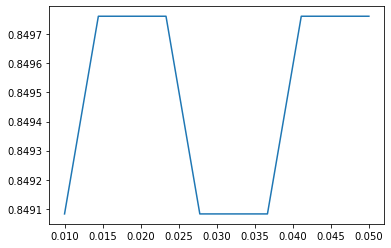

In [77]:
import matplotlib.pyplot as plt

# 往多捕捉少数类的的方向调参 - 使得多捕捉少数类的同时，尽量少损失多数类，达到一个accuracy最高点
irange = np.linspace(0.01,0.05,10)

score = []
for i in irange:
    clf = SVC(kernel = 'linear'
              ,gamma = 'auto'
              ,cache_size = 5000
              ,class_weight={1:1+i} 
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score.append(clf.score(X_test, y_test))  # Accuracy
    
plt.figure()
plt.plot(irange, score)

In [80]:
irange = np.linspace(0.01,0.03,10)

for i in irange:
    clf = SVC(kernel = 'linear'
              ,gamma = 'auto'
              ,cache_size = 5000
              ,class_weight={1:1+i} 
             ).fit(X_train, y_train)
    result = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    recall = recall_score(y_test, result)
    auc = roc_auc_score(y_test, clf.decision_function(X_test))
    print('Under 1:{}, accuracy is {}, recall is {}, auc is {}'.format(i,score, recall, auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%S:%f'))

Under 1:0.01, accuracy is 0.849082256968049, recall is 0.4755700325732899, auc is 0.8646641369197533
27:22:718712
Under 1:0.012222222222222221, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8648376372611571
27:26:411864
Under 1:0.014444444444444444, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8648404356537603
27:30:169814
Under 1:0.016666666666666666, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646921208457861
27:34:035473
Under 1:0.018888888888888886, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646277578159105
27:37:817460
Under 1:0.02111111111111111, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646417497789269
27:41:566796
Under 1:0.02333333333333333, accuracy is 0.849762066621346, recall is 0.4788273615635179, auc is 0.8646053706750841
27:45:508225
Under 1:0.025555555555555554, accuracy is 0.849082256968049, recall is 0.4788273615635179, auc is 0.86463055

In [ ]:
# 没有得到更高的accuracy
# 考虑更换模型

In [92]:
from sklearn.linear_model import LogisticRegression as LR
logreg = LR(solver='liblinear').fit(X_train, y_train)
logreg.score(X_test, y_test)

0.8484024473147519

In [87]:
C_range = np.linspace(0.01,0.2,10)

for c in C_range:
    logreg = LR(solver='liblinear', C=c).fit(X_train, y_train)
    print(c,logreg.score(X_test, y_test))
# 舍弃logisticRegression

0.01 0.8395649218218899
0.03111111111111111 0.8450033990482665
0.052222222222222225 0.8456832087015635
0.07333333333333333 0.8470428280081577
0.09444444444444444 0.849082256968049
0.11555555555555555 0.849762066621346
0.1366666666666667 0.8504418762746431
0.1577777777777778 0.8484024473147519
0.1788888888888889 0.8477226376614548
0.2 0.8470428280081577


In [89]:
# 3. 追求平衡 - ROC曲线
from sklearn.metrics import roc_curve as ROC

In [94]:
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,cache_size = 5000
         ).fit(X_train, y_train)
result = clf.predict(X_test)
score = clf.score(X_test, y_test)
recall = recall_score(y_test, result)
auc = roc_auc_score(y_test, clf.decision_function(X_test))

In [95]:
score

0.849082256968049

In [96]:
recall

0.4755700325732899

In [97]:
auc

0.8647536854830586

In [98]:
FPR, Recall, Thresholds = ROC(y_test,clf.decision_function(X_test),pos_label=1)
area = roc_auc_score(y_test,clf.decision_function(X_test))

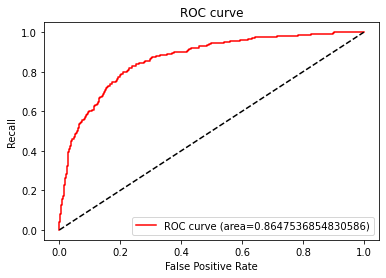

In [100]:
plt.figure()
plt.plot(FPR, Recall, color='red'
        ,label='ROC curve (area={})'.format(area))
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [101]:
maxindex = (Recall - FPR).tolist().index(max(Recall-FPR))
Thresholds[maxindex]  #最佳阈值

-0.9808004112443867

In [102]:
# 基于最佳阈值，计算y_prect
from sklearn.metrics import accuracy_score as AC

time = time()
clf = SVC(kernel = 'linear'
          ,gamma = 'auto'
          ,cache_size = 5000
          ,class_weight = 'balanced'
         ).fit(X_train, y_train)

#创建dataframe
prob = pd.DataFrame(clf.decision_function(X_test))

In [105]:
prob.head()

,0,y_pred
0,-1.038628,0.0
1,0.121101,1.0
2,-1.448225,0.0
3,-1.495193,0.0
4,0.829631,1.0


In [104]:
# 按照最佳阈值，添加y_pred列
prob.loc[prob.iloc[:,0] >= Thresholds[maxindex],'y_pred'] = 1
prob.loc[prob.iloc[:,0] < Thresholds[maxindex],'y_pred'] = 0

In [107]:
prob.iloc[:,1].isnull().sum()

0

In [109]:
# 检查模型的accuracy
score = AC(y_test, prob.iloc[:,1].values)  # 计算Accuracy
recall = recall_score(y_test,prob.iloc[:,1])
print('Tesing accuracy is {}, recall is {}'.format(score, recall))

Tesing accuracy is 0.5975526852481305, recall is 0.9381107491856677


In [ ]:
# 结论：SVC达到的平衡